In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("insurance.csv")
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

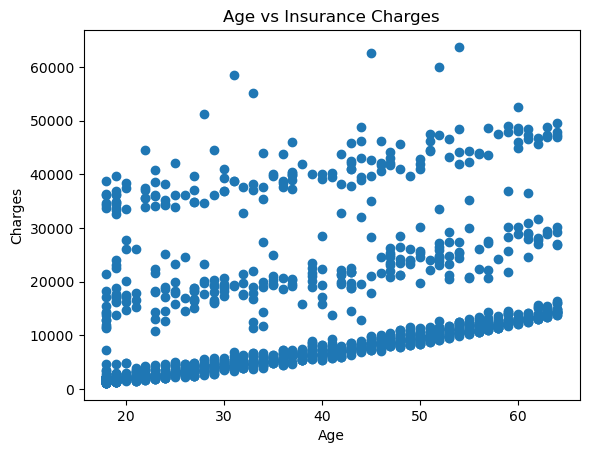

In [4]:
plt.figure()
plt.scatter(df["age"], df["charges"])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Insurance Charges")
plt.show()

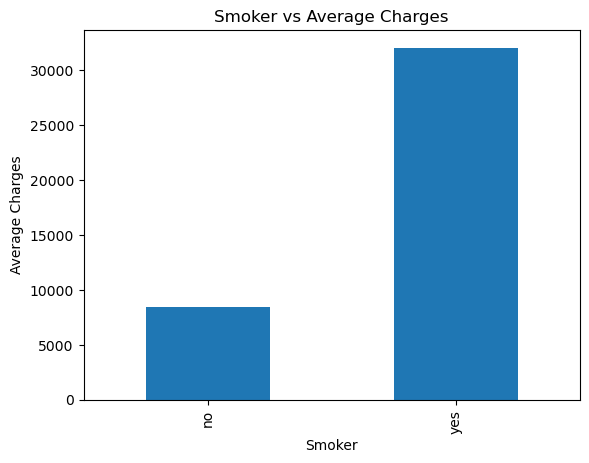

In [5]:
plt.figure()
df.groupby("smoker")["charges"].mean().plot(kind="bar")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.title("Smoker vs Average Charges")
plt.show()

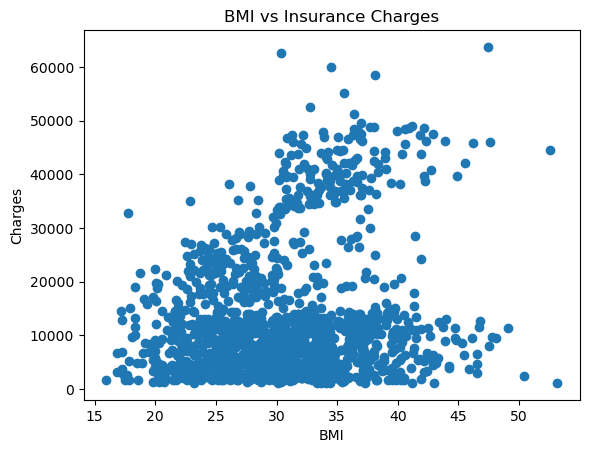

In [7]:
plt.figure()
plt.scatter(df["bmi"], df["charges"])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Insurance Charges")
plt.show()

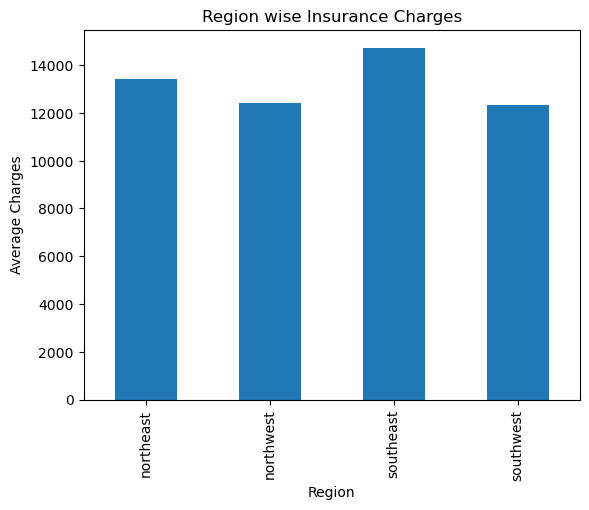

In [8]:
plt.figure()
df.groupby("region")["charges"].mean().plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.title("Region wise Insurance Charges")
plt.show()

In [9]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

print(numeric_df.corr())


               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


In [13]:
# Convert categorical to numeric
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})
df["region"] = df["region"].astype("category").cat.codes

print(df.corr()

               age  sex       bmi  children  smoker    region   charges
age       1.000000  NaN  0.109272  0.042469     NaN  0.002127  0.299008
sex            NaN  NaN       NaN       NaN     NaN       NaN       NaN
bmi       0.109272  NaN  1.000000  0.012759     NaN  0.157566  0.198341
children  0.042469  NaN  0.012759  1.000000     NaN  0.016569  0.067998
smoker         NaN  NaN       NaN       NaN     NaN       NaN       NaN
region    0.002127  NaN  0.157566  0.016569     NaN  1.000000 -0.006208
charges   0.299008  NaN  0.198341  0.067998     NaN -0.006208  1.000000


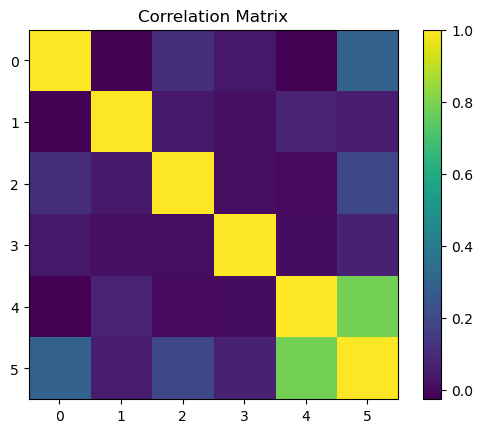

In [14]:
plt.figure()
plt.imshow(numeric_df.corr())
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

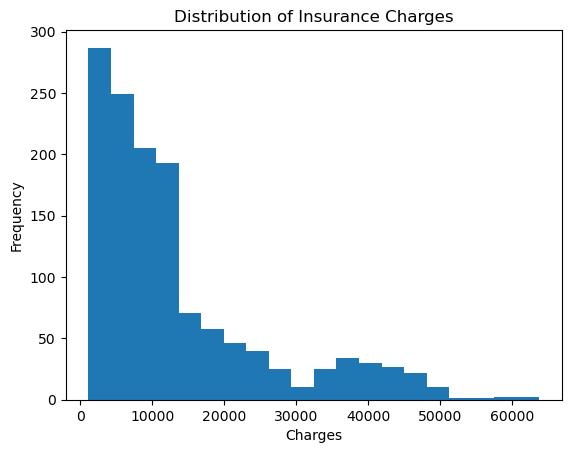

In [15]:
plt.figure()
plt.hist(df["charges"], bins=20)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Insurance Charges")
plt.show()


<Figure size 640x480 with 0 Axes>

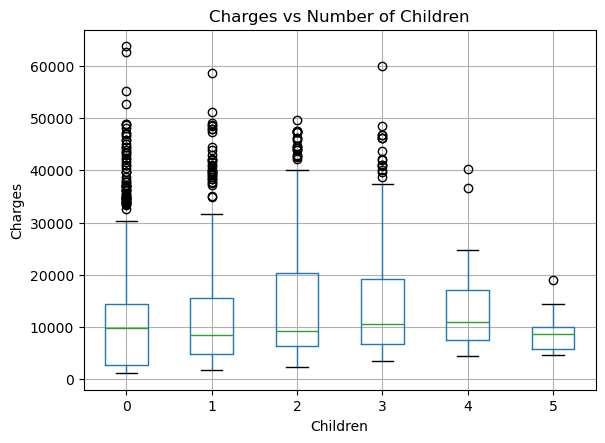

In [16]:
plt.figure()
df.boxplot(column="charges", by="children")
plt.title("Charges vs Number of Children")
plt.suptitle("")
plt.xlabel("Children")
plt.ylabel("Charges")
plt.show()


In [18]:
def predict_charge(smoker, bmi):
    if smoker == 1 and bmi > 30:
        return "High Charges"
    else:
        return "Normal Charges"

print(predict_charge(1, 32))


High Charges


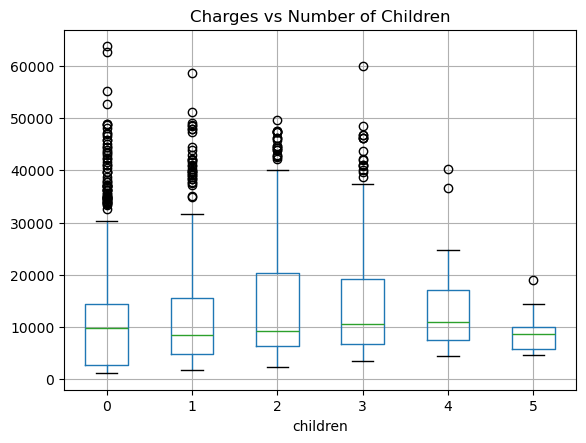